In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave

### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M

In [3]:
idh_m_alto=['Porto Velho',
           'Ariquemes',
           'Ji-Paraná',
           'Pimenta Bueno',
            'Cacoal',
            'Vilhena',
            'Rolim de Moura'
           ]

idh_m_medio=["Candeias do Jamari",
             "Guajará-Mirim",
             "Itapuã do Oeste",
             "Alto Paraíso",
             "Buritis",
             "Cacaulândia",
             "Cujubim",
             "Monte Negro",
             "Rio Crespo",
             "Jaru",
             "Alvorada D'Oeste",
             "Costa Marques",
             "Mirante da Serra",
             "Ouro Preto do Oeste",
             "Presidente Médici",
             "São Francisco do Guaporé",
             "São Miguel do Guaporé",
             "Teixeirópolis",
             "Urupá",
             "Vale do Paraíso",
             "Alta Floresta D'Oeste",
             "Castanheiras",
             "Primavera de Rondônia",
             "Santa Luzia D'Oeste",
             "São Felipe D'Oeste",
             "Espigão D'Oeste",
             "Ministro Andreazza",
             "Nova Brasilândia D'Oeste",
             "Novo Horizonte do Oeste",
             "Parecis",
             "Cabixi",
             "Cerejeiras",
             "Chupinguaia",
             "Colorado do Oeste",
             "Corumbiara",
             "Pimenteiras do Oeste",
             ]
     
     
idh_m_baixo=["Nova Mamoré",
            "Campo Novo de Rondônia",
            "Governador Jorge Teixeira",
            "Machadinho D'Oeste",
            "Theobroma",
            "Vale do Anari",
            "Nova União",
            "Seringueiras",
            "Alto Alegre dos Parecis",
            ]


In [4]:
idh = {}
for municipio in sinasc_raw['munResNome']:
    if municipio in idh_m_alto:
        classe = 'IDH Alto'
    elif municipio in idh_m_medio:
        classe = 'IDH Medio'
    elif municipio in idh_m_baixo:
        classe = 'IDH Baixo'
    else:
        classe = 'Não localizado'   
    idh.update({ municipio : classe })
    
print(idh)

{"Alta Floresta D'Oeste": 'IDH Medio', 'Alto Alegre dos Parecis': 'IDH Baixo', 'Novo Horizonte do Oeste': 'IDH Medio', 'Rolim de Moura': 'IDH Alto', "São Felipe D'Oeste": 'IDH Medio', 'Ariquemes': 'IDH Alto', 'Cujubim': 'IDH Medio', 'Alto Paraíso': 'IDH Medio', 'Monte Negro': 'IDH Medio', 'Jaru': 'IDH Medio', 'Rio Crespo': 'IDH Medio', 'Porto Velho': 'IDH Alto', 'Cacaulândia': 'IDH Medio', 'Itapuã do Oeste': 'IDH Medio', 'Ji-Paraná': 'IDH Alto', 'Buritis': 'IDH Medio', 'Vilhena': 'IDH Alto', 'Vale do Anari': 'IDH Baixo', 'Candeias do Jamari': 'IDH Medio', 'Costa Marques': 'IDH Medio', 'Campo Novo de Rondônia': 'IDH Baixo', "Machadinho D'Oeste": 'IDH Baixo', 'Colorado do Oeste': 'IDH Medio', 'Nova Mamoré': 'IDH Baixo', 'Urupá': 'IDH Medio', 'Ouro Preto do Oeste': 'IDH Medio', 'Corumbiara': 'IDH Medio', 'São Miguel do Guaporé': 'IDH Medio', 'Governador Jorge Teixeira': 'IDH Baixo', "Santa Luzia D'Oeste": 'IDH Medio', 'Pimenta Bueno': 'IDH Alto', 'Mirante da Serra': 'IDH Medio', 'Cerejeir

In [5]:
sinasc_5 = sinasc_raw.set_index('munResNome')
sinasc_5.groupby(idh)['IDADEPAI'].describe()

,count,mean,std,min,25%,50%,75%,max
munResNome,,,,,,,,
IDH Alto,4508.0,31.074091,7.773149,15.0,25.0,30.0,36.0,70.0
IDH Baixo,447.0,30.617450,7.417345,16.0,25.0,30.0,36.0,58.0
IDH Medio,2651.0,31.207092,7.824859,16.0,25.0,30.0,36.0,86.0
Não localizado,1.0,22.000000,NaN,22.0,22.0,22.0,22.0,22.0


In [6]:
sinasc_5.groupby(idh)['IDADEMAE'].describe()

,count,mean,std,min,25%,50%,75%,max
munResNome,,,,,,,,
IDH Alto,16855.0,26.280332,6.415374,12.0,21.0,26.0,31.0,47.0
IDH Baixo,1826.0,25.326944,6.194908,13.0,20.0,25.0,29.0,46.0
IDH Medio,8346.0,25.884855,6.353274,11.0,21.0,25.0,30.0,53.0
Não localizado,1.0,24.000000,NaN,24.0,24.0,24.0,24.0,24.0


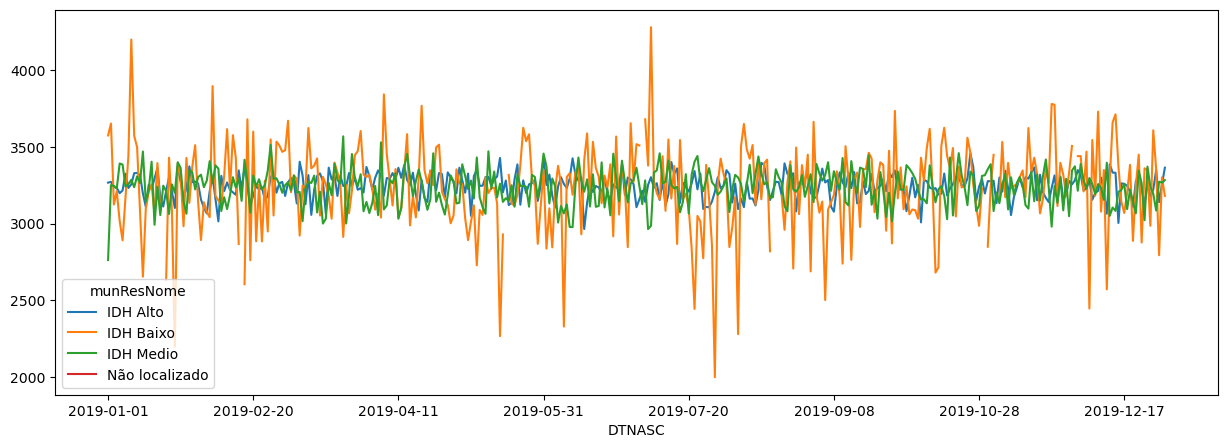

In [7]:
sinasc_5.groupby(['DTNASC', idh])['PESO'].mean().unstack().plot(figsize=[15,5]);

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM

In [8]:
ifdm_moderado=["Porto Velho",
           "Ariquemes",
           "Ji-Paraná",
           "Pimenta Bueno",
           "Cacoal",
           "Vilhena",
           "Rolim de Moura",
           "Candeias do Jamari",
           "Buritis",
           "Monte Negro",
           "Rio Crespo",
           "Jaru",
           "Ouro Preto do Oeste",
           "Presidente Médici",
           "São Francisco do Guaporé",
           "São Miguel do Guaporé",
           "Teixeirópolis",
           "Urupá",
           "Alta Floresta D'Oeste",
           "Primavera de Rondônia",
           "Santa Luzia D'Oeste",
           "São Felipe D'Oeste",
           "Pimenteiras do Oeste",
           "Cerejeiras",
           "Chupinguaia",
           "Colorado do Oeste",
          ]
     
     
ifdm_regular=["Nova Mamoré",
              "Campo Novo de Rondônia",
              "Governador Jorge Teixeira", 
              "Machadinho D'Oeste", 
              "Theobroma", 
              "Vale do Anari", 
              "Nova União", 
              "Seringueiras", 
              "Alto Alegre dos Parecis", 
              "Guajará-Mirim", 
              "Itapuã do Oeste",
              "Alto Paraíso", 
              "Cacaulândia", 
              "Cujubim", 
              "Alvorada D'Oeste", 
              "Costa Marques", 
              "Mirante da Serra",
              "Vale do Paraíso", 
              "Castanheiras", 
              "Espigão D'Oeste", 
              "Ministro Andreazza", 
              "Nova Brasilândia D'Oeste",
              "Novo Horizonte do Oeste", 
              "Parecis", 
              "Cabixi", 
              "Corumbiara"]

In [9]:
ifdm = {}
for municipio in sinasc_raw['munResNome']:
    if municipio in ifdm_moderado:
        classe = 'IIFDM Moderado'
    elif municipio in ifdm_regular:
        classe = 'IFDM Regular'
    else:
        classe = 'Não localizado'   
    ifdm.update({ municipio : classe })
    
print(ifdm)

{"Alta Floresta D'Oeste": 'IIFDM Moderado', 'Alto Alegre dos Parecis': 'IFDM Regular', 'Novo Horizonte do Oeste': 'IFDM Regular', 'Rolim de Moura': 'IIFDM Moderado', "São Felipe D'Oeste": 'IIFDM Moderado', 'Ariquemes': 'IIFDM Moderado', 'Cujubim': 'IFDM Regular', 'Alto Paraíso': 'IFDM Regular', 'Monte Negro': 'IIFDM Moderado', 'Jaru': 'IIFDM Moderado', 'Rio Crespo': 'IIFDM Moderado', 'Porto Velho': 'IIFDM Moderado', 'Cacaulândia': 'IFDM Regular', 'Itapuã do Oeste': 'IFDM Regular', 'Ji-Paraná': 'IIFDM Moderado', 'Buritis': 'IIFDM Moderado', 'Vilhena': 'IIFDM Moderado', 'Vale do Anari': 'IFDM Regular', 'Candeias do Jamari': 'IIFDM Moderado', 'Costa Marques': 'IFDM Regular', 'Campo Novo de Rondônia': 'IFDM Regular', "Machadinho D'Oeste": 'IFDM Regular', 'Colorado do Oeste': 'IIFDM Moderado', 'Nova Mamoré': 'IFDM Regular', 'Urupá': 'IIFDM Moderado', 'Ouro Preto do Oeste': 'IIFDM Moderado', 'Corumbiara': 'IFDM Regular', 'São Miguel do Guaporé': 'IIFDM Moderado', 'Governador Jorge Teixeira':

In [10]:
sinasc_5 = sinasc_raw.set_index('munResNome')
sinasc_5.groupby(ifdm)['PESO'].describe()

,count,mean,std,min,25%,50%,75%,max
munResNome,,,,,,,,
IFDM Regular,5081.0,3242.203306,531.374264,425.0,2970.0,3270.0,3560.0,5985.0
IIFDM Moderado,21946.0,3243.420532,547.829184,258.0,2965.0,3274.0,3580.0,5720.0
Não localizado,1.0,3215.000000,NaN,3215.0,3215.0,3215.0,3215.0,3215.0


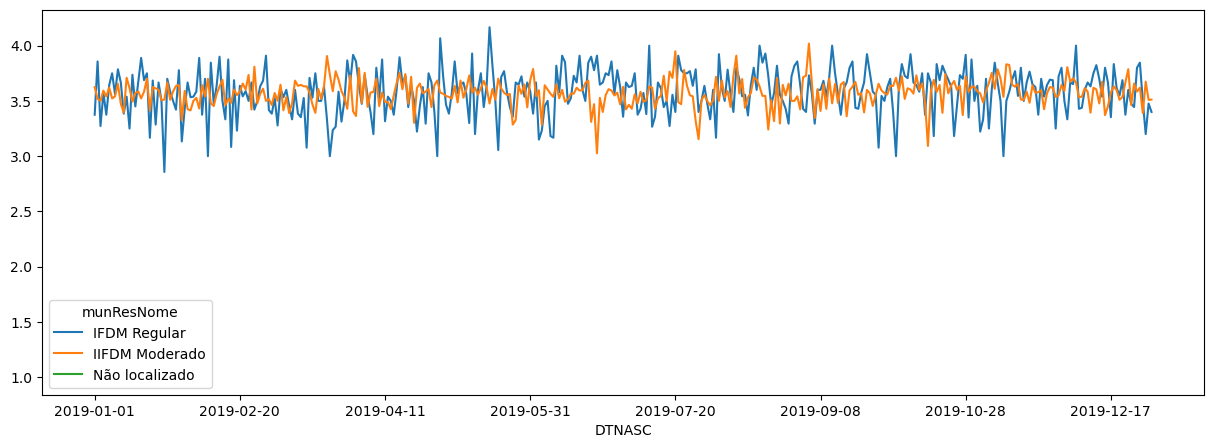

In [11]:
sinasc_5.groupby(['DTNASC', ifdm])['CONSULTAS'].mean().unstack().plot(figsize=[15,5]);

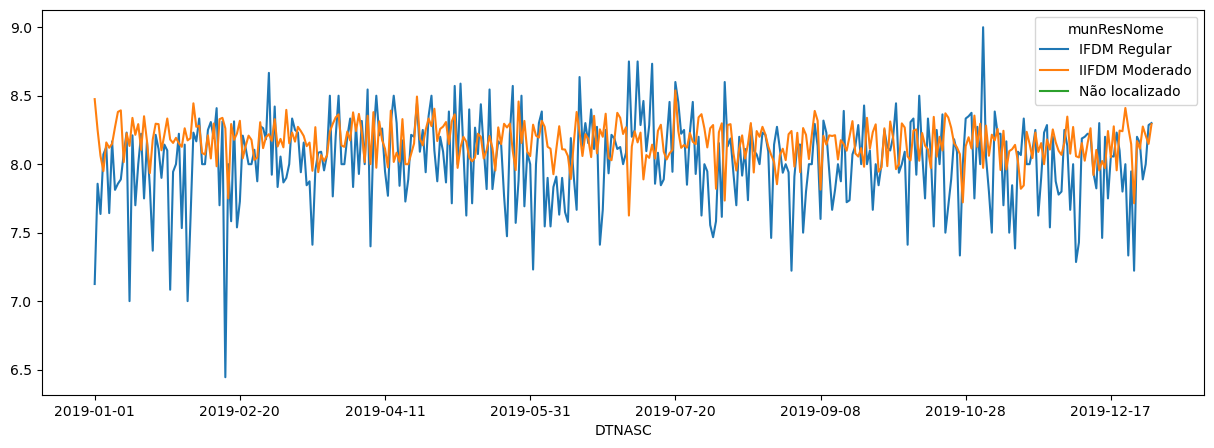

In [12]:
sinasc_5.groupby(['DTNASC', ifdm])['APGAR1'].mean().unstack().plot(figsize=[15,5]);

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [13]:
acima_1_bilhao = ["Porto Velho",
                 "Ji-Paraná",
                 "Vilhena",
                 "Ariquemes",
                 "Cacoal",
                 "Jaru",
                 "Rolim de Moura",
                 "Pimenta Bueno"
                 ]

acima_500_milhoes = ["Guajará-Mirim",
                    "Ouro Preto do Oeste",
                    "Buritis",
                    "Machadinho D'Oeste",
                    "Espigão D'Oeste",
                    "São Miguel do Guaporé",
                    "Candeias do Jamari",
                    "Nova Mamoré",
                    "Cerejeiras"]

acima_300_milhoes = ["Alta Floresta D'Oeste",
                    "Presidente Médici",
                    "Cujubim",
                    "Nova Brasilândia D'Oeste",
                    "Alto Paraíso",
                    "São Francisco do Guaporé",
                    "Colorado do Oeste"]

acima_200_milhoes = ["Monte Negro",
                    "Alto Alegre dos Parecis",
                    "Campo Novo de Rondônia",
                    "Alvorada D'Oeste"]

acima_100_milhoes = ["Chupinguaia",
                    "Corumbiara"
                    "Ministro Andreazza",
                    "Urupá",
                    "Costa Marques",
                    "Seringueiras",
                    "Mirante da Serra",
                    "Governador Jorge Teixeira",
                    "Theobroma",
                    "Santa Luzia D'Oeste",
                    "Novo Horizonte do Oeste",
                    "Itapuã do Oeste",
                    "Vale do Paraíso",
                    "Cacaulândia",
                    "Cabixi",
                    "Vale do Anari"]

ate_100_milhoes = ["Nova União",
                  "Parecis",
                  "Rio Crespo",
                  "Pimenteiras do Oeste",
                  "Teixeirópolis",
                  "São Felipe D'Oeste",
                  "Castanheiras",
                  "Primavera de Rondônia"]



In [14]:
pib = {}
for municipio in sinasc_raw['munResNome']:
    if municipio in acima_1_bilhao:
        classe = 'Acima de 1 Bilhão'
    elif municipio in acima_500_milhoes:
        classe = 'Acima de 500 Milhões'
    elif municipio in acima_300_milhoes:
        classe = 'Acima de 300 Milhões'
    elif municipio in acima_200_milhoes:
        classe = 'Acima de 200 Milhões'
    elif municipio in acima_100_milhoes:
        classe = 'Acima de 100 Milhões'
    elif municipio in ate_100_milhoes:
        classe = 'Até 100 Milhões'
    else:
        classe = 'Não localizado'   
    pib.update({ municipio : classe })
    
print(pib)

{"Alta Floresta D'Oeste": 'Acima de 300 Milhões', 'Alto Alegre dos Parecis': 'Acima de 200 Milhões', 'Novo Horizonte do Oeste': 'Acima de 100 Milhões', 'Rolim de Moura': 'Acima de 1 Bilhão', "São Felipe D'Oeste": 'Até 100 Milhões', 'Ariquemes': 'Acima de 1 Bilhão', 'Cujubim': 'Acima de 300 Milhões', 'Alto Paraíso': 'Acima de 300 Milhões', 'Monte Negro': 'Acima de 200 Milhões', 'Jaru': 'Acima de 1 Bilhão', 'Rio Crespo': 'Até 100 Milhões', 'Porto Velho': 'Acima de 1 Bilhão', 'Cacaulândia': 'Acima de 100 Milhões', 'Itapuã do Oeste': 'Acima de 100 Milhões', 'Ji-Paraná': 'Acima de 1 Bilhão', 'Buritis': 'Acima de 500 Milhões', 'Vilhena': 'Acima de 1 Bilhão', 'Vale do Anari': 'Acima de 100 Milhões', 'Candeias do Jamari': 'Acima de 500 Milhões', 'Costa Marques': 'Acima de 100 Milhões', 'Campo Novo de Rondônia': 'Acima de 200 Milhões', "Machadinho D'Oeste": 'Acima de 500 Milhões', 'Colorado do Oeste': 'Acima de 300 Milhões', 'Nova Mamoré': 'Acima de 500 Milhões', 'Urupá': 'Acima de 100 Milhões'

In [15]:
sinasc_5 = sinasc_raw.set_index('munResNome')
sinasc_5.groupby(pib)['PESO'].describe()

,count,mean,std,min,25%,50%,75%,max
munResNome,,,,,,,,
Acima de 1 Bilhão,17736.0,3247.215719,550.349000,292.0,2965.00,3275.0,3585.00,5720.0
Acima de 100 Milhões,1741.0,3250.608271,518.765487,425.0,2965.00,3265.0,3570.00,4785.0
Acima de 200 Milhões,724.0,3231.439227,505.282858,930.0,2964.25,3245.0,3555.00,4855.0
Acima de 300 Milhões,1880.0,3225.818617,529.057966,258.0,2980.00,3270.0,3535.25,4980.0
Acima de 500 Milhões,4304.0,3239.456087,543.471131,285.0,2963.00,3275.0,3560.00,5985.0
Até 100 Milhões,431.0,3186.264501,556.918014,320.0,2907.50,3200.0,3530.00,4505.0
Não localizado,212.0,3231.273585,547.160841,790.0,2930.00,3233.5,3534.25,4810.0


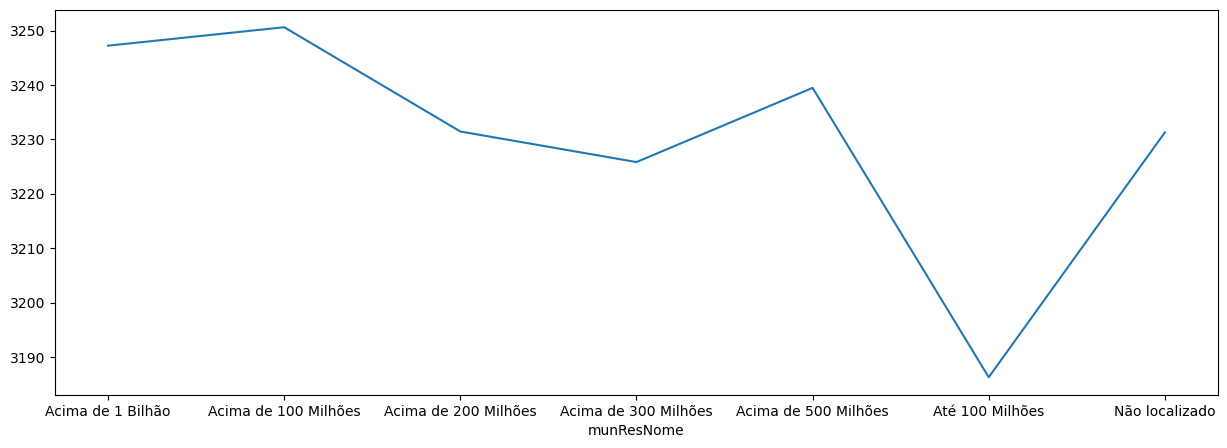

In [16]:
sinasc_5.groupby(pib)['PESO'].mean().plot(figsize=[15,5]);

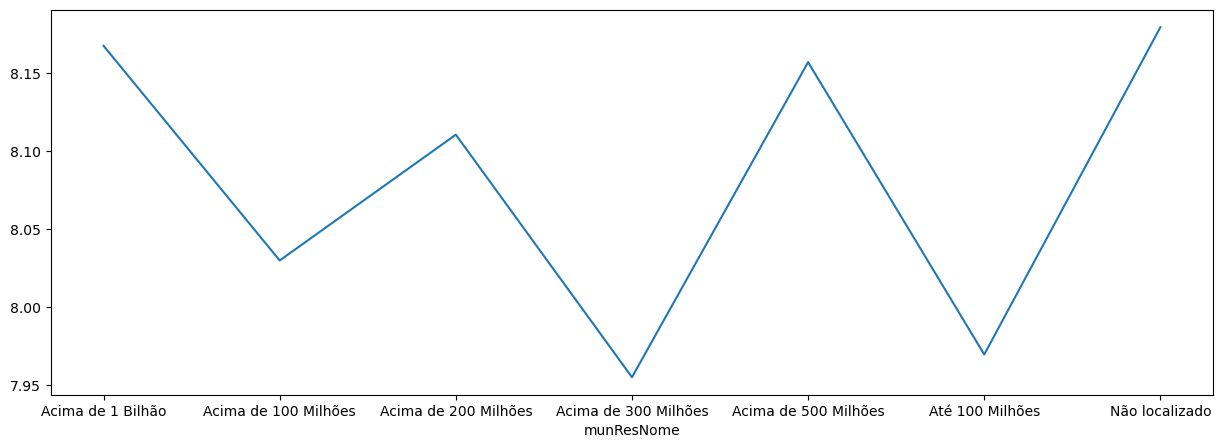

In [17]:
sinasc_5.groupby(pib)['APGAR1'].mean().plot(figsize=[15,5]);

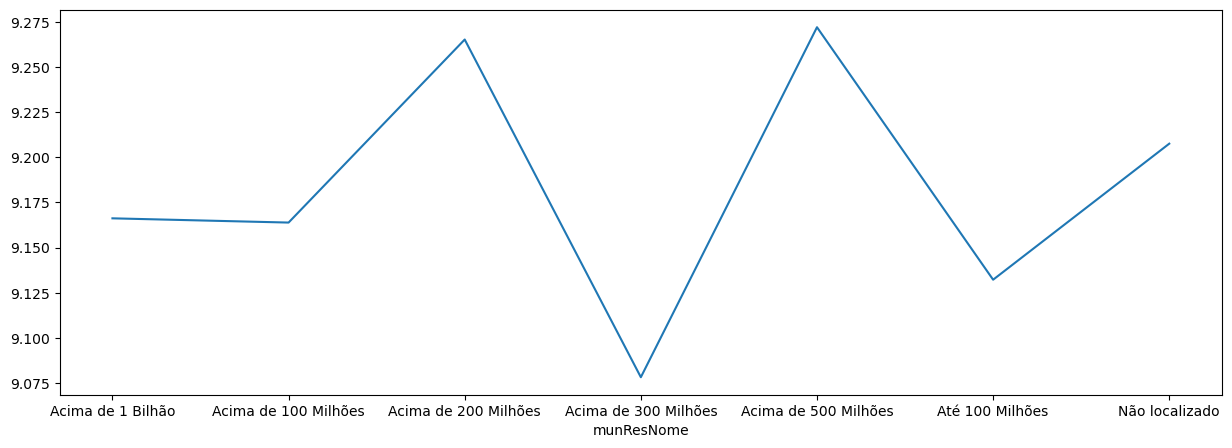

In [18]:
sinasc_5.groupby(pib)['APGAR5'].mean().plot(figsize=[15,5]);

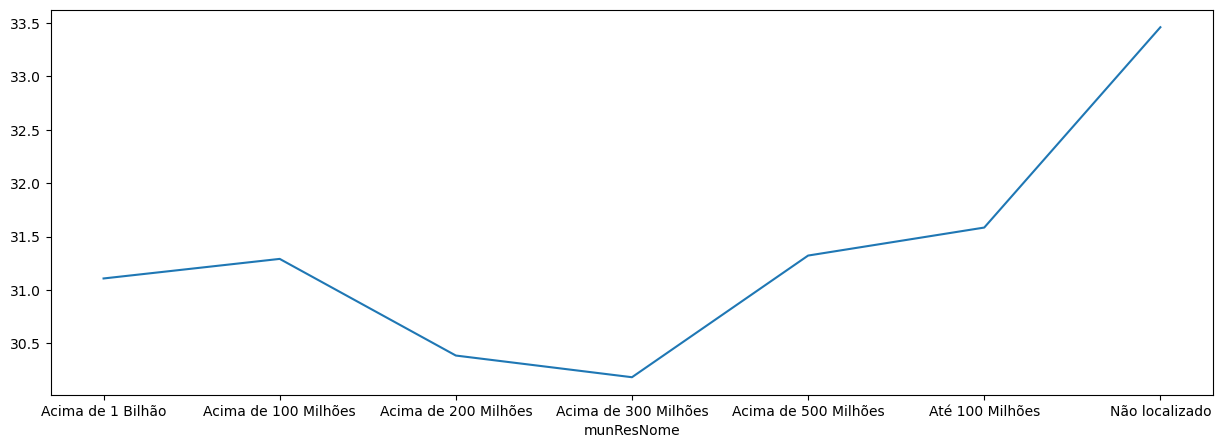

In [19]:
sinasc_5.groupby(pib)['IDADEPAI'].mean().plot(figsize=[15,5]);

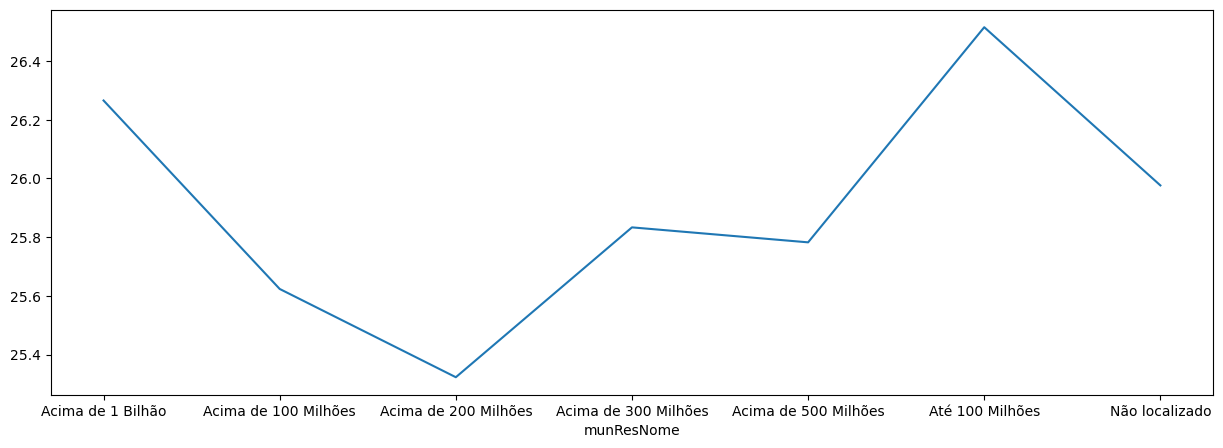

In [20]:
sinasc_5.groupby(pib)['IDADEMAE'].mean().plot(figsize=[15,5]);

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

IDH: os pais são mais velhos que as mães, porém a média não tem uma variação muito grande entre as faixas de IDH. Os pais e as mães são um pouco mais velhas quando comparadas as médias no municípios de IDH Alto.

Em relação ao peso dos bebês, no gráfico, é possível verificar uma variação ao longo do tempo na faixa de IDH Baixo é grande. Nas demais essa variável é mais estável (obs: desconsiderado a faixa Não Localizado devido a inconsistência da informação).

IFDM:IDH: no APGAR1 foi possível identificar uma variação nos municípios classificados com IDFM Regular, o que não acontecem com a mesma intensidade nos demais municípios. Portanto, é possível concluir que o desenvolvimento do município pode impactar na qualidade de vida do bebê no início de sua vida. 

As variáveis PESO e CONSULTAS não apresentaram variação.

PIB: possível identificar que o peso dos bebês reduz bastante na categoria com PIB mais baixo. Para a variável APGAR1 é adequado ampliar os estudos, visto que as categorias "Até 100 milhoes e Acima de 300 milhões estão com as médias mais baixas, porém a categoria Acima de 200 Milhões tem um comportamento diferente.

Sobre a idade dos pais e mães é possível verificar que nas categorias com valores mais baixos a idade das mães é menor, contudo a idade dos pais não apresenta o mesmo padrão. Outra diferença é que a idade dos pais tem pouca variação entre as categorias, ao contrário da idade das mães com amplitude de 2 anos.